In [244]:
# !pip install --upgrade pip

In [245]:
# !pip install yfinance

In [246]:
# import libraries

import numpy as np 
import pandas as pd
import yfinance as yf

from sklearn.preprocessing import StandardScaler # use it because kmean is sentsitive for the wide range of features, then we apply it for normalization

import matplotlib.pyplot as plt 
%matplotlib inline

In [247]:
start = "2010-01-01"
end = "2023-12-31"

In [248]:
baba_df = yf.download("BABA", start = start, end = end, progress = False) # raw data
baba_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-19,92.699997,99.699997,89.949997,93.889999,92.644608,271879400
2014-09-22,92.699997,92.949997,89.500000,89.889999,88.697670,66657800
2014-09-23,88.940002,90.480003,86.620003,87.169998,86.013741,39009800
2014-09-24,88.470001,90.570000,87.220001,90.570000,89.368645,32088000
2014-09-25,91.089996,91.500000,88.500000,88.919998,87.740532,28598000


In [249]:
baba_df.shape

(2336, 6)

In [250]:
baba_df.index

DatetimeIndex(['2014-09-19', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26', '2014-09-29', '2014-09-30',
               '2014-10-01', '2014-10-02',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=2336, freq=None)

In [251]:
type(baba_df)

pandas.core.frame.DataFrame

In [252]:
stock = baba_df.copy()
stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-19,92.699997,99.699997,89.949997,93.889999,92.644608,271879400
2014-09-22,92.699997,92.949997,89.500000,89.889999,88.697670,66657800
2014-09-23,88.940002,90.480003,86.620003,87.169998,86.013741,39009800
2014-09-24,88.470001,90.570000,87.220001,90.570000,89.368645,32088000
2014-09-25,91.089996,91.500000,88.500000,88.919998,87.740532,28598000


In [253]:
stock.shape

(2336, 6)

Text(0.5, 1.0, 'Adj Close')

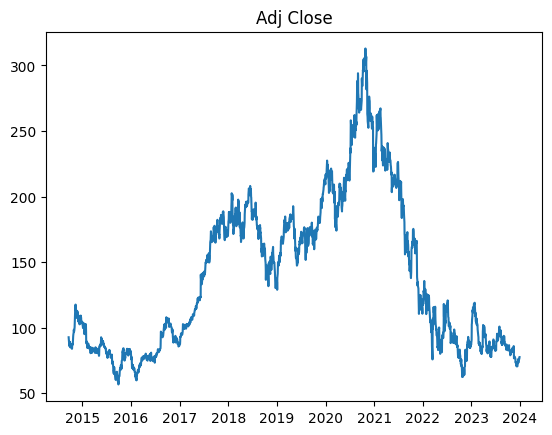

In [254]:
# plot 

plt.plot(stock['Adj Close'])
plt.title('Adj Close')

In [255]:
# get feature for clustering

# calculate log return
stock['Log Rets'] = np.log(stock['Adj Close'] / stock['Adj Close'].shift(1))
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets
Date,,,,,,,
2014-09-19,92.699997,99.699997,89.949997,93.889999,92.644608,271879400,NaN
2014-09-22,92.699997,92.949997,89.500000,89.889999,88.697670,66657800,-0.043537
2014-09-23,88.940002,90.480003,86.620003,87.169998,86.013741,39009800,-0.030727
2014-09-24,88.470001,90.570000,87.220001,90.570000,89.368645,32088000,0.038263
2014-09-25,91.089996,91.500000,88.500000,88.919998,87.740532,28598000,-0.018386


In [256]:
np.log(88.697670/92.644608)

-0.04353713286995342

In [257]:
stock.shape

(2336, 7)

In [258]:
stock.dropna(inplace = True)

In [259]:
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets
Date,,,,,,,
2014-09-22,92.699997,92.949997,89.500000,89.889999,88.697670,66657800,-0.043537
2014-09-23,88.940002,90.480003,86.620003,87.169998,86.013741,39009800,-0.030727
2014-09-24,88.470001,90.570000,87.220001,90.570000,89.368645,32088000,0.038263
2014-09-25,91.089996,91.500000,88.500000,88.919998,87.740532,28598000,-0.018386
2014-09-26,89.730003,90.459999,88.660004,90.459999,89.260109,18340000,0.017171


In [260]:
stock.shape

(2335, 7)

In [261]:
# prepare features to be used for clustering

stock['Rets Mean'] = stock['Log Rets'].rolling(5).mean() # calculate mean eavery 5 days
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets,Rets Mean
Date,,,,,,,,
2014-09-22,92.699997,92.949997,89.500000,89.889999,88.697670,66657800,-0.043537,NaN
2014-09-23,88.940002,90.480003,86.620003,87.169998,86.013741,39009800,-0.030727,NaN
2014-09-24,88.470001,90.570000,87.220001,90.570000,89.368645,32088000,0.038263,NaN
2014-09-25,91.089996,91.500000,88.500000,88.919998,87.740532,28598000,-0.018386,NaN
2014-09-26,89.730003,90.459999,88.660004,90.459999,89.260109,18340000,0.017171,-0.007443


In [262]:
stock['Rets STD'] = stock['Log Rets'].rolling(5).std() # calculate mean eavery 5 days
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets,Rets Mean,Rets STD
Date,,,,,,,,,
2014-09-22,92.699997,92.949997,89.500000,89.889999,88.697670,66657800,-0.043537,NaN,NaN
2014-09-23,88.940002,90.480003,86.620003,87.169998,86.013741,39009800,-0.030727,NaN,NaN
2014-09-24,88.470001,90.570000,87.220001,90.570000,89.368645,32088000,0.038263,NaN,NaN
2014-09-25,91.089996,91.500000,88.500000,88.919998,87.740532,28598000,-0.018386,NaN,NaN
2014-09-26,89.730003,90.459999,88.660004,90.459999,89.260109,18340000,0.017171,-0.007443,0.03413


In [263]:
stock.dropna(inplace = True)
stock.head()

# or we can use
# stock = stock.dropna()

,Open,High,Low,Close,Adj Close,Volume,Log Rets,Rets Mean,Rets STD
Date,,,,,,,,,
2014-09-26,89.730003,90.459999,88.660004,90.459999,89.260109,18340000,0.017171,-0.007443,0.034130
2014-09-29,89.620003,89.699997,88.019997,88.750000,87.572784,25302000,-0.019084,-0.002553,0.029037
2014-09-30,89.000000,90.879997,88.459999,88.849998,87.671463,24419400,0.001126,0.003818,0.024441
2014-10-01,88.699997,88.940002,86.040001,86.099998,84.957939,24029600,-0.031440,-0.010123,0.019200
2014-10-02,86.269997,88.199997,85.611000,87.059998,85.905205,21469700,0.011088,-0.004228,0.020508


In [264]:
stock.shape

(2331, 9)

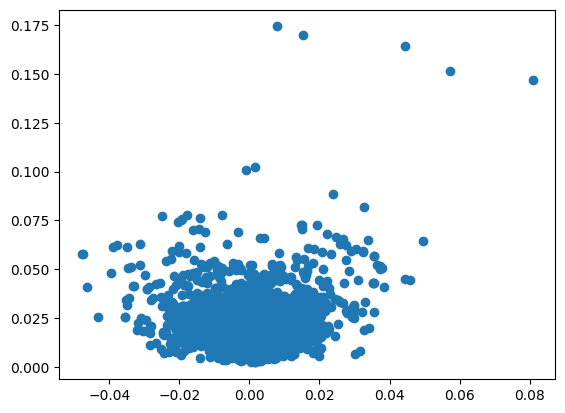

In [265]:
# plot

plt.scatter(stock['Rets Mean'], stock['Rets STD']); # plot X and y

In [266]:
# get array X in order to perform clustering

X1 = stock['Rets Mean']
X1

Date
2014-09-26   -0.007443
2014-09-29   -0.002553
2014-09-30    0.003818
2014-10-01   -0.010123
2014-10-02   -0.004228
                ...   
2023-12-22    0.004727
2023-12-26    0.008042
2023-12-27    0.004572
2023-12-28    0.010335
2023-12-29    0.003252
Name: Rets Mean, Length: 2331, dtype: float64

In [267]:
type(X1)

pandas.core.series.Series

In [268]:
X2 = stock['Rets STD']
X2

Date
2014-09-26    0.034130
2014-09-29    0.029037
2014-09-30    0.024441
2014-10-01    0.019200
2014-10-02    0.020508
                ...   
2023-12-22    0.023878
2023-12-26    0.022607
2023-12-27    0.021467
2023-12-28    0.018926
2023-12-29    0.010154
Name: Rets STD, Length: 2331, dtype: float64

In [269]:
type(X2)

pandas.core.series.Series

In [270]:
X1 = stock['Rets Mean'].values
X1

array([-0.00744321, -0.00255267,  0.00381788, ...,  0.00457163,
        0.01033499,  0.00325168])

In [271]:
X2 = stock['Rets STD'].values
X2

array([0.03413033, 0.02903737, 0.02444137, ..., 0.02146687, 0.01892569,
       0.01015397])

In [272]:
type(X1), type(X2)

(numpy.ndarray, numpy.ndarray)

In [273]:
X = np.array(list(zip(X1, X2)))
X

array([[-0.00744321,  0.03413033],
       [-0.00255267,  0.02903737],
       [ 0.00381788,  0.02444137],
       ...,
       [ 0.00457163,  0.02146687],
       [ 0.01033499,  0.01892569],
       [ 0.00325168,  0.01015397]])

In [274]:
type(X)

numpy.ndarray

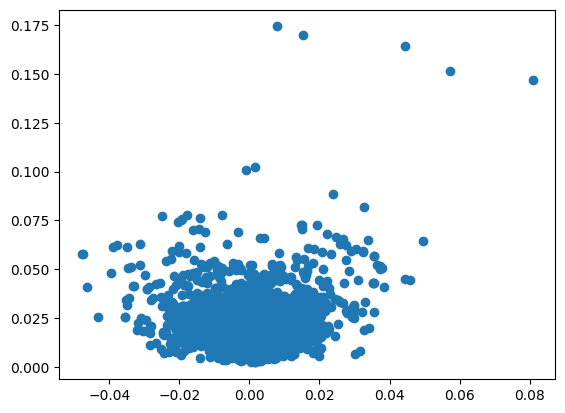

In [275]:
# plot 

plt.scatter(X[:, 0], X[:, 1]); # not need to use stock dataframe

In [276]:
# feature X are not bad but require normalization for kmean - better

def normalizedFeature(x):
    sc = StandardScaler()
    x = sc.fit_transform(x)

    return x


In [277]:
# call a function and keep data in X_norm
X_norm = normalizedFeature(X)
X_norm

array([[-0.64642521,  0.86102206],
       [-0.2179584 ,  0.49902732],
       [ 0.34017362,  0.17235457],
       ...,
       [ 0.40621077, -0.039066  ],
       [ 0.911146  , -0.21968672],
       [ 0.29056827, -0.84315945]])

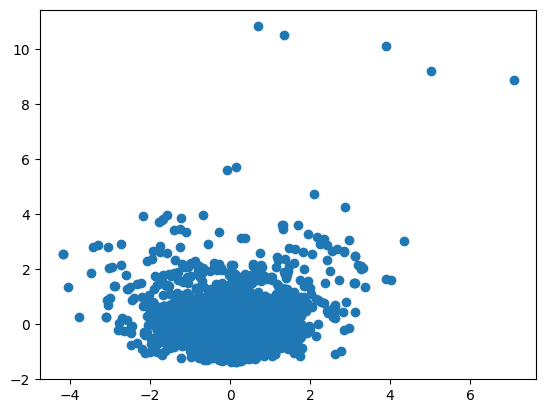

In [278]:
# plot 

plt.scatter(X_norm[:, 0], X_norm[:, 1]);

In [279]:
# start KMean Clustering

# prepare a function for distance between 2 points

def distance_fn(a, b, ax = 1):
    return np.linalg.norm(a-b, axis = ax) # Euclidean distance

In [280]:
def plotCluster(data, C, K, cluster_label):

    colors = ['green', 'blue', 'orange', 'red', 'yellow', 'pink', 'purple', 'salmon']

    plt.figure(figsize = (8, 6))

    for i in range(K):
        points = [] # empty list
        points = np.array([data[j] for j in range(len(data)) if cluster_label[j] == i]) # find data for each cluster
        plt.scatter(points[:, 0], points[:, 1], s = 7, c = colors[i]) # plot
        plt.annotate(i, (C[i, 0], C[i, 1]), size = 20)
        
    plt.scatter(C[:, 0], C[:, 1], marker = '*', color = 'black', s = 200)

    plt.xlabel('Rets Mean')
    plt.ylabel('Rets STD')
    plt.title('Cluster')

In [281]:
def kmeanClustering(data, K):

    # step 1. random centroids
    C_x = np.random.randint(np.min(data[:, 0]), np.max(data[:, 0]), size = K)
    C_y = np.random.randint(np.min(data[:, 1]), np.max(data[:, 1]), size = K)

    # set Centroid to variable C
    C = np.zeros((K, 2))
    C_old = np.zeros(C.shape)

    C[:, 0] = C_x 
    C[:, 1] = C_y 

    # Step 2. label data
    cluster_label = np.zeros((len(data), 1))

    for i in range(len(data)): # run 150 rounds - depands on length of data
        distance = distance_fn(data[i, :], C)
        cluster = np.argmin(distance) # for the shortest distance
        cluster_label[i] = cluster

    # Step 3. calculate new centroids
    C_old = C.copy()

    for i in range(K):
        points = [] # empty list
        points = np.array([data[j] for j in range(len(data)) if cluster_label[j] == i])
        C[i] = np.mean(points, axis = 0) # calculate mean and keep in C for each group (i)

    # Calculate error
    error = distance_fn(C, C_old, None)
    
    # Plot
    plotCluster(data, C, K, cluster_label)

    # Check if error is ok to stop
    while error != 0: # will stop when error = 0
    
        cluster_label = np.zeros((len(data), 1))
    
        for i in range(len(data)):
            distance = distance_fn(data[i, :], C)
            cluster = np.argmin(distance)
            cluster_label[i] = cluster
    
        C_old = C.copy()
    
        for i in range(K):
            points = []
            points = np.array([data[j] for j in range(len(data)) if cluster_label[j] == i])
            C[i] = np.mean(points, axis=0)
        
        plotCluster(data, C, K, cluster_label.copy())
    
        error = distance_fn(C, C_old, None)
        print(error)

    return cluster_label

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

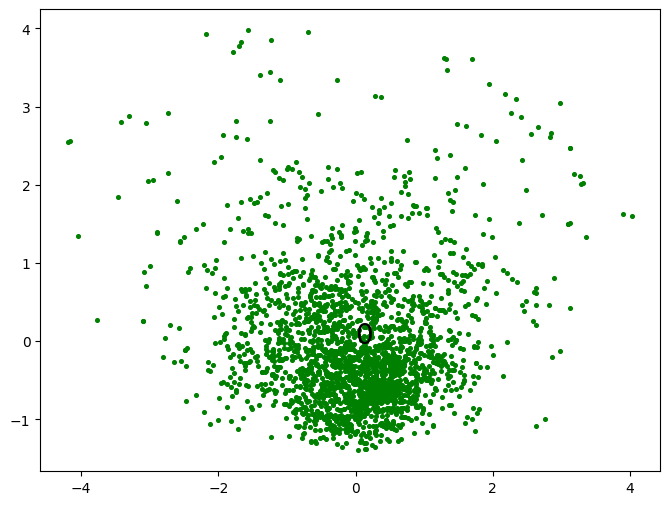

In [282]:
# call a function
K = 3
label_kmean = kmeanClustering(X_norm, K)

In [ ]:
label_kmean

### Use label from KMean

In [ ]:
stock['Class'] = label_kmean 
stock.head(10)

In [ ]:
# idea to trade

idx_c0 = np.where(stock['Class'] == 0) # find index in class 0
idx_c0

In [ ]:
len(idx_c0)

In [ ]:
len(idx_c0[0])

In [ ]:
idx_c1 = np.where(stock['Class'] == 1)
idx_c1

In [ ]:
len(idx_c1[0])

In [ ]:
idx_c2 = np.where(stock['Class'] == 2)
idx_c2

In [ ]:
len(idx_c2[0])

In [ ]:
len(stock), len(idx_c0[0]) + len(idx_c1[0]) + len(idx_c2[0])

In [ ]:
# if we would like to trade only some class

profit_c0 = stock['Log Rets']
profit_c0

In [ ]:
type(profit_c0)

In [ ]:
profit_c0 = np.array(profit_c0).reshape(-1, 1)
profit_c0

In [ ]:
profit_c0[idx_c1, 0] = 0
profit_c0[idx_c2, 0] = 0
profit_c0

In [ ]:
plt.plot(profit_c0.cumsum())
plt.title('Cluster 0 Profit')

In [ ]:
profit_c1 = np.array(stock['Log Rets']).reshape(-1, 1)
profit_c1

In [ ]:
profit_c1[idx_c0, 0] = 0
profit_c1[idx_c2, 0] = 0
profit_c1

In [ ]:
plt.plot(profit_c1.cumsum())
plt.title('Cluster 1 Profit')

In [ ]:
profit_c2 = np.array(stock['Log Rets']).reshape(-1, 1)
profit_c2

In [ ]:
profit_c2[idx_c0, 0] = 0
profit_c2[idx_c1, 0] = 0
profit_c2

In [ ]:
plt.plot(profit_c2.cumsum())
plt.title('Cluster 2 Profit')

*** Require to select the correct class and time before trade
- What we require to do more
    - Lock ahead bias
    - In sample & Out sample

In [ ]:
stock.head()

In [ ]:
stock.head(10)